In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn import metrics

import seaborn as sns
import plotly as py
import plotly.graph_objs as go
import matplotlib.pyplot as plt

: 

: 

In [21]:
df = pd.read_csv("Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [22]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [23]:
total = df.isnull().sum().sort_values(ascending=False)
percent = df.isnull().sum()/df.isnull().count()*100
percent_2 = (round(percent, 1)).sort_values(ascending=False)

# 0 là hàng 1 là cột
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data

,Total,%
CustomerID,0,0.0
Gender,0,0.0
Age,0,0.0
Annual Income (k$),0,0.0
Spending Score (1-100),0,0.0


c:\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

c:\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

c:\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



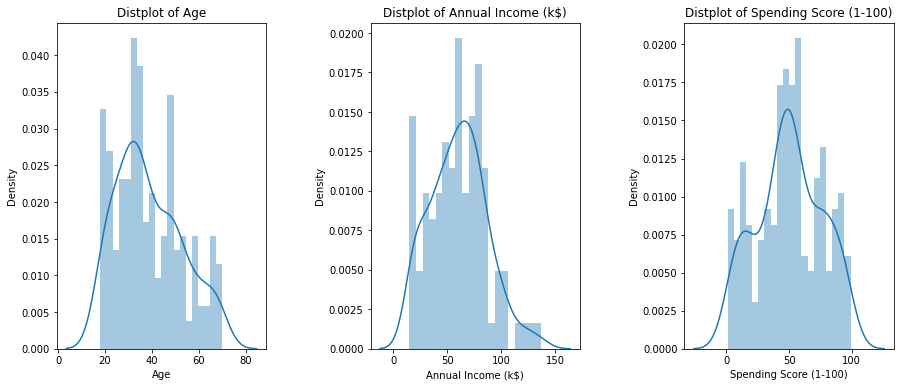

In [24]:
plt.figure(1, figsize=(15,6))
n = 0

for x in ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']:
    n = n + 1
    plt.subplot(1, 3, n)
    plt.subplots_adjust(hspace=0.5, wspace=0.5)
    sns.distplot(df[x], bins = 20)
    plt.title('Distplot of {}'.format(x))

plt.show()

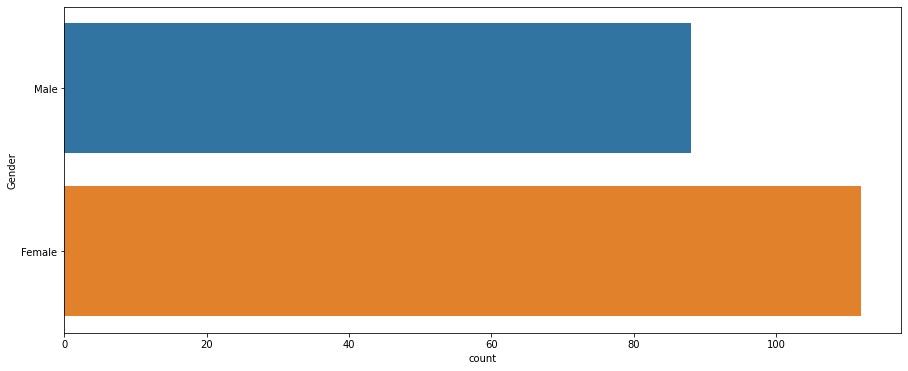

In [25]:
plt.figure(1, figsize=(15,6))
sns.countplot(y = 'Gender', data=df)
plt.show()

In [26]:
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

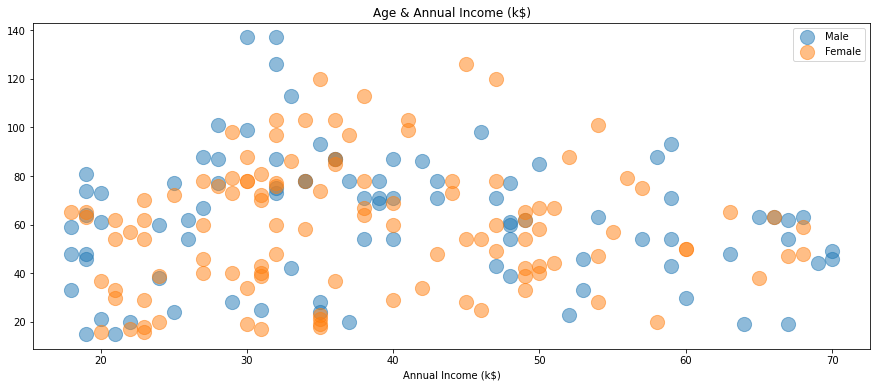

In [27]:
plt.figure(1, figsize=(15,6))
for gender in ['Male', 'Female']:
    plt.scatter(x='Age', y='Annual Income (k$)', data=df[df['Gender']== gender], s=200, alpha=0.5, label=gender)

plt.xlabel('Age')
plt.xlabel('Annual Income (k$)')
plt.title('Age & Annual Income (k$)')
plt.legend()
plt.show()

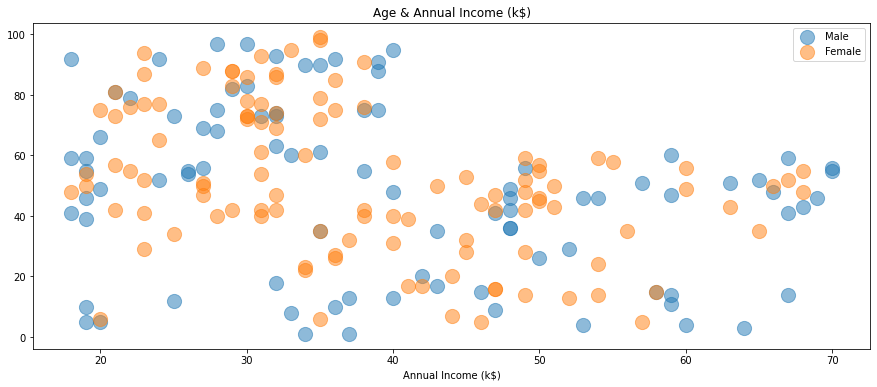

In [28]:
plt.figure(1, figsize=(15,6))
for gender in ['Male', 'Female']:
    plt.scatter(x='Age', y='Spending Score (1-100)', data=df[df['Gender']== gender], s=200, alpha=0.5, label=gender)

plt.xlabel('Age')
plt.xlabel('Annual Income (k$)')
plt.title('Age & Annual Income (k$)')
plt.legend()
plt.show()

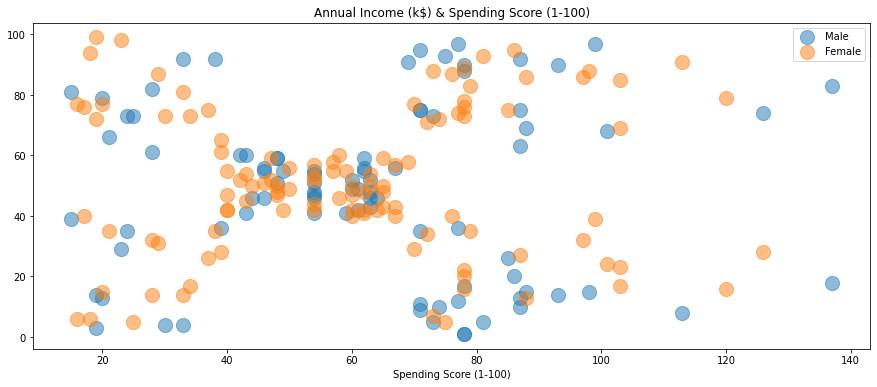

In [29]:

plt.figure(1, figsize=(15,6))
for gender in ['Male', 'Female']:
    plt.scatter(x='Annual Income (k$)', y='Spending Score (1-100)', data=df[df['Gender']== gender], s=200, alpha=0.5, label=gender)

plt.xlabel('Annual Income (k$)')
plt.xlabel('Spending Score (1-100)')
plt.title('Annual Income (k$) & Spending Score (1-100)')
plt.legend()
plt.show()

In [33]:
X1 = df[['Age', 'Spending Score (1-100)']].iloc[:,:].values
inertia = []
for n in range(1, 11):
    algo_k = KMeans(n_clusters=n, init='random')
    algo_k.fit(X1)
    inertia.append(algo_k.inertia_)

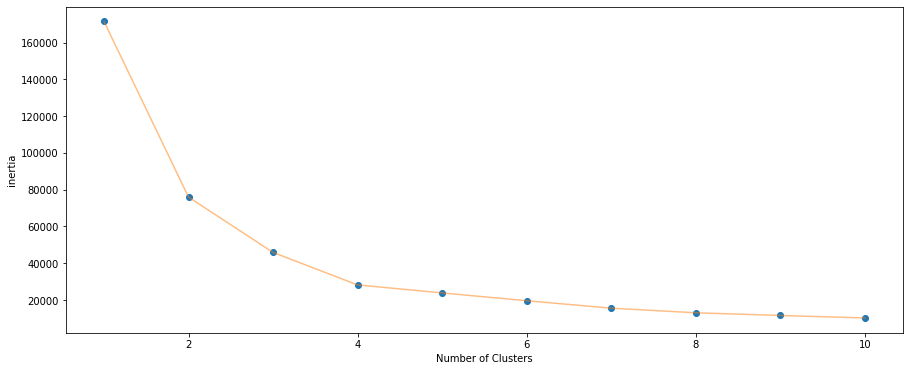

In [36]:
plt.figure(1, figsize=(15,6))
plt.plot(np.arange(1,11), inertia, 'o')
plt.plot(np.arange(1,11), inertia, '-', alpha=0.5)
plt.xlabel('Number of Clusters')
plt.ylabel('inertia')
plt.show()

In [37]:
algo_4 = KMeans(n_clusters=4, init='random')
algo_4.fit(X1)
labels1 = algo_4.labels_
centroids1 = algo_4.cluster_centers_
centroids1

array([[43.29166667, 15.02083333],
       [27.61702128, 49.14893617],
       [30.1754386 , 82.35087719],
       [55.70833333, 48.22916667]])

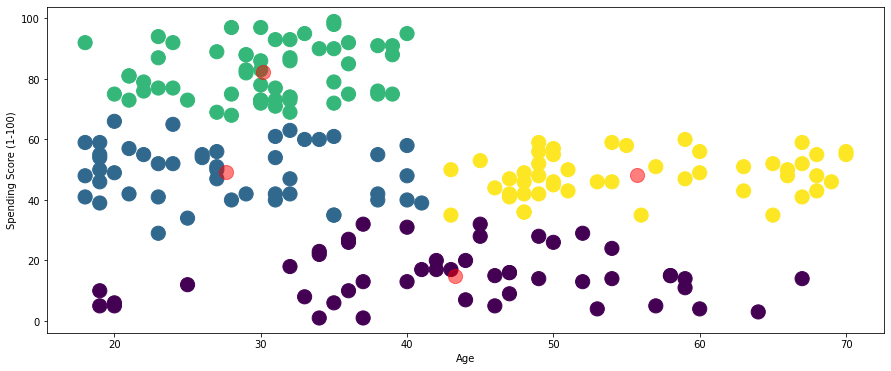

In [39]:
plt.figure(1, figsize=(15,6))
plt.clf()
plt.scatter(x = 'Age', y = 'Spending Score (1-100)', data=df, c = labels1, s = 200)
plt.scatter(x = centroids1[:, 0], y = centroids1[:, 1], s = 200, c = 'red', alpha=0.5)
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.show()

In [41]:
metrics.silhouette_score(X1, labels1, metric='euclidean')

0.49973941540141753